In [1]:
import requests 
from selenium import webdriver as wd 
from selenium.webdriver.common.by import By 
from selenium.webdriver.support.ui import WebDriverWait 
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import pandas as pd
import json # import json module
%matplotlib inline
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('건강에너지드링크.json') as json_file:
    json_data = json.load(json_file)

In [3]:
df = pd.DataFrame(json_data['data'])

In [4]:
df

,index,Post,Hashtags,Locates,Date,Likes
0,0,"[🔖 200129\n#몬스터에너지 #몬스터에너지울트라\n\n카페인 없으면 좀비지만,...","[몬스터에너지, 몬스터에너지울트라, 박카스, 에너지드링크]",[],2020년 7월 27일,[164]
1,1,[마..퇴근했으믄\n한잔 쭉빨고 운동가야제.. D-8\n#포항 #퇴근 #헬스 #몬스...,"[포항, 퇴근, 헬스, 몬스터에너지울트라, 프로틴바, 운동, 일상, 운동하는남자, ...",[포항 영일대해수욕장],2019년 10월 5일,[261]
2,2,[.\n.\n몬스터에너지는 하루에 하나만 먹읍니다.\n잠을 못잤는데 화장은 굿뜨 !...,"[불금, 피곤, 몬스터에너지, 몬스터에너지울트라, 화장, 굳뜨, 인스타데일리, 인스...","[Seoul, Korea]",2019년 9월 27일,[229]
3,3,[째려 보는거 아닙니당 🤨\n햇빛이 너무 쌔서 눈을 못뜨겠..ㅋㅋㅋ🌞\n#몬스터에너...,"[몬스터에너지, 비키니, 촬영, 물놀이, 몬스터즈_민강사, 오늘도몬스터, Monst...",[],2018년 7월 23일,"[2,019]"
4,4,[Just some chill.😎🍹🥃 .\n.#몬스터에너지드링크#몬스터에너지#몬스터...,"[몬스터에너지드링크, 몬스터에너지, 몬스터에너지와함께, 몬스터, 에너지드링크, 몬스...",[Yeet],2019년 12월 14일,[114]
...,...,...,...,...,...,...
1575,1575,[캔구루 (𝗞𝗮𝗻𝗴𝘂𝗿𝘂) 🦘\n⠀\n의사가 만든 호주 프...,"[캔구루, Kanguru]",[],2020년 5월 21일,[2]
1576,1576,[캔구루 (𝗞𝗮𝗻𝗴𝘂𝗿𝘂) 🦘\n⠀\n의사가 만든 호주 프...,"[캔구루, Kanguru]",[],2020년 5월 21일,[2]
1577,1577,[캔구루 (𝗞𝗮𝗻𝗴𝘂𝗿𝘂) 🦘\n⠀\n의사가 만든 호주 프...,"[캔구루, Kanguru]",[],2020년 5월 21일,[2]
1578,1578,[캔구루 (𝗞𝗮𝗻𝗴𝘂𝗿𝘂) 🦘\n⠀\n의사가 만든 호주 프...,"[캔구루, Kanguru]",[],2020년 5월 21일,[2]


# Hashtags 분석

# 1. Word Cloud

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [10]:
tags = [element for array in list(df.Hashtags) for element in array]

In [11]:
tags[0:5]

['몬스터에너지', '몬스터에너지울트라', '박카스', '에너지드링크', '포항']

In [42]:
hed_stop_words = ['error','몬스터에너지','몬스터', '에너지','monsterenergy', '에너지드링크','박카스','비타500'\
                     , '몬스터에너지울트라', '캔구루', '핫식스', '레드불', '몬스터울트라', 'kanguru','monster',\
                 'monsterenergyultra','일상', 'daily', '데일리', \
                 '좋아요', '소통', '맞팔', '선팔', '푸마', 'coke', '팔로우','캔구루','monsterultra','에너지음료',
                 '몬스터에너지드링크','오늘도몬스터','monsterenergydrink' ]

In [43]:
cv = CountVectorizer(max_features=10000, stop_words = hed_stop_words)

In [44]:
tdm = cv.fit_transform(tags)

In [45]:
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [46]:
word_count.sort_values('빈도', ascending=False).head(15)

,단어,빈도
2101,다이어트,120
4559,운동,90
4612,운동하는여자,74
4606,운동하는남자,66
337,energydrink,66
1507,고카페인,64
6369,헬스,58
471,health,58
5640,카페인,57
6385,헬스타그램,55


In [47]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [48]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

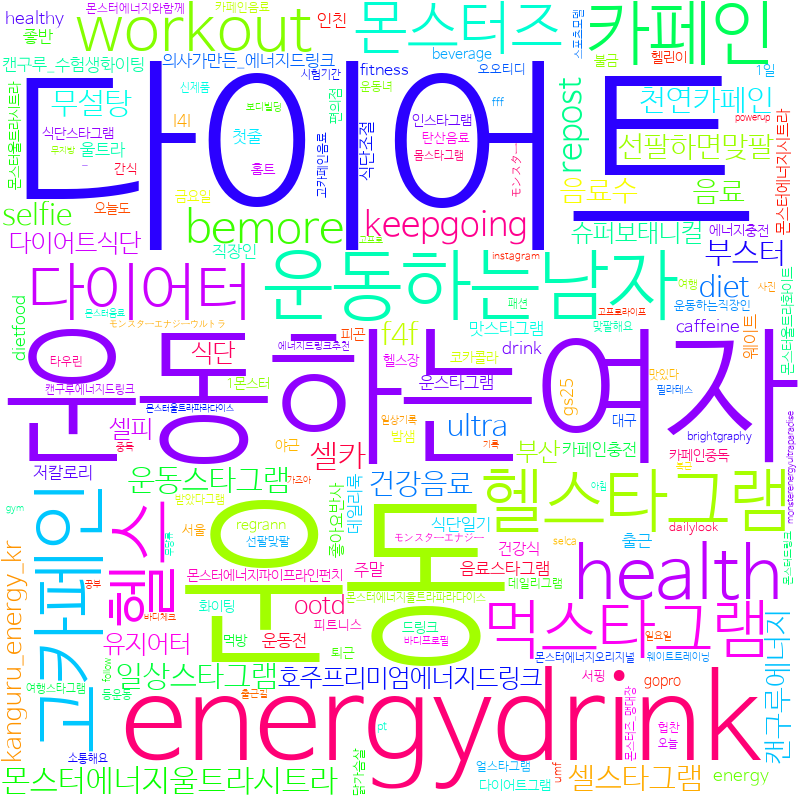

In [49]:
cloud.to_image()

# 2. Embedding

### - LSA

### - tags

In [81]:
tdm.shape

(17382, 6630)

In [82]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [83]:
words = cv.get_feature_names()

In [84]:
tokens = tags

In [85]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 1.93 s


In [86]:
from sklearn.decomposition import TruncatedSVD

In [87]:
svd = TruncatedSVD(n_components=1000)

In [88]:
svd.fit(tdm)

TruncatedSVD(algorithm='randomized', n_components=1000, n_iter=5,
             random_state=None, tol=0.0)

In [89]:
svd.components_.shape

(1000, 6630)

In [90]:
word_emb = svd.components_.T

In [91]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

일상 4934
다이어트 2106
에너지음료 4227
daily 273
데일리 2265
운동 4571
맞팔 2641
캔구루 1178
운동하는여자 4624
소통 3649
monsterultra 671
오늘도몬스터 4386
energydrink 339
운동하는남자 4618
고카페인 1512
헬스 6384
health 473
카페인 5654
몬스터에너지드링크 2796
헬스타그램 6400
좋아요 5253
선팔 3579
먹스타그램 2698
다이어터 2102
workout 963
monsterenergydrink 650
몬스터즈 2850
bemore 193
keepgoing 564
몬스터울트라 1056
repost 801
몬스터에너지울트라시트라 2816
웨이트 1136
셀카 3619
팔로우 5979
헬스 1202
운동스타그램 1127
무설탕 2919
헬스타그램 1204
운동스타그램 4593
일상스타그램 4943
운동후 1134
메모장 1045
매일 1039
f4f 356
건강 988
운동일지 1129
천연카페인 5475
운동 1125
건강그램 989
부스터 3263
운동일기 1128
셀스타그램 3618
selfie 821
diet 297
건강음료 1413
음료 4758
에너지드링크 1102
ultra 915
음료수 4761
캔구루에너지 5705
호주프리미엄에너지드링크 6450
선팔하면맞팔 3583
kanguru_energy_kr 560
식단 3862
셀피 3626
슈퍼보태니컬 3768
유지어터 4727
부산 3250
의사가만든_에너지드링크 4777
다이어트식단 2122
ootd 737
인친 4905
energy 338
출근 5578
healthy 475
맛스타그램 2615
좋아요반사 5258
울트라 4652
식단조절 3870
gs25 446
웨이트 4698
카페인충전 5679
데일리룩 2269
운스타그램 4637
좋반 5250


In [92]:
word_emb = svd.components_.T

In [93]:
from adjustText import adjust_text
from matplotlib import pyplot
from matplotlib import font_manager, rc

In [94]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

Wall time: 1min 7s


117

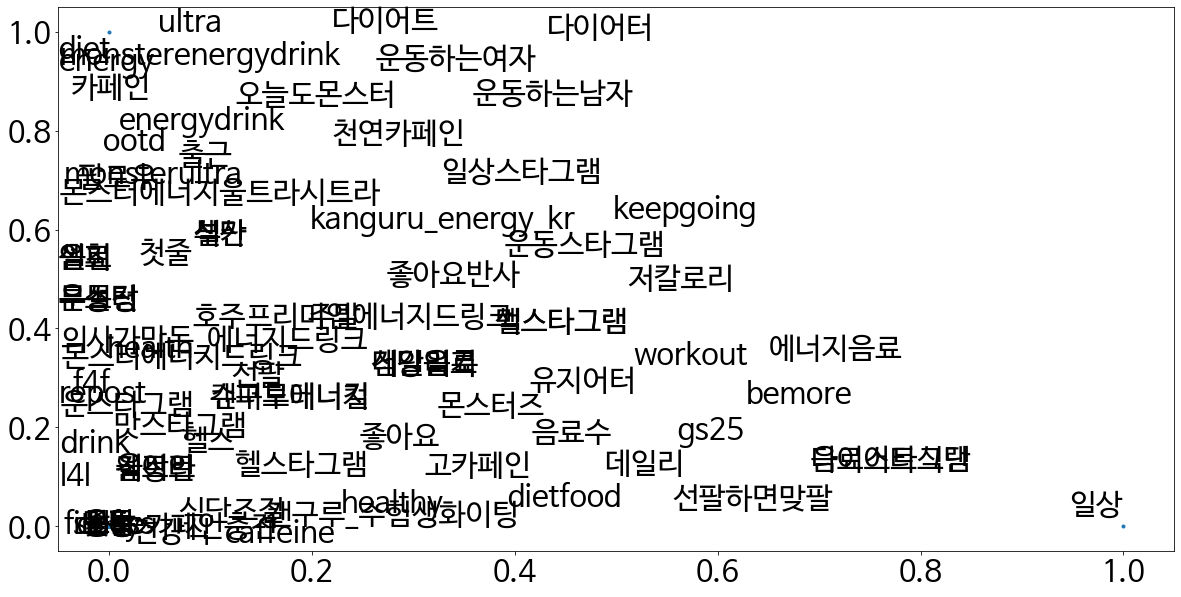

In [95]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - T-SNE

In [96]:
from sklearn.manifold import TSNE

In [97]:
tsne = TSNE()

In [98]:
%%time
pos = tsne.fit_transform(word_emb)

Wall time: 11min 47s


29

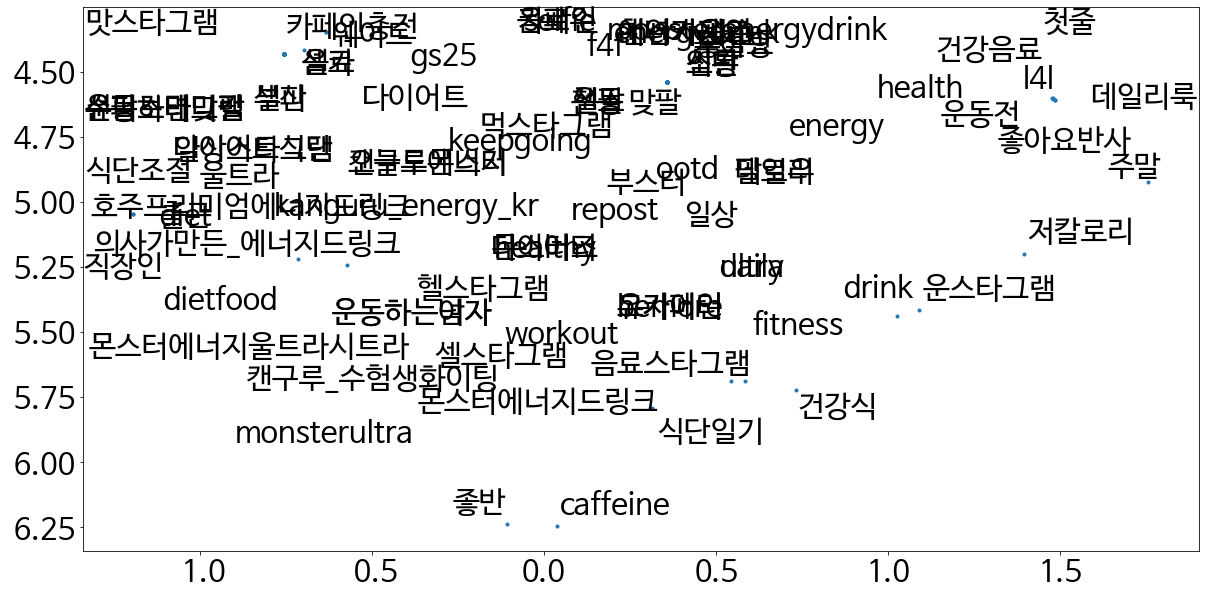

In [99]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

### - Word2Vec

In [100]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA

In [101]:
sentences = list(df['Hashtags'])

In [105]:
model = Word2Vec(sentences, size = 1000, min_count = 50, workers = 4, window = 100) # negative, sg

In [106]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [107]:
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [108]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

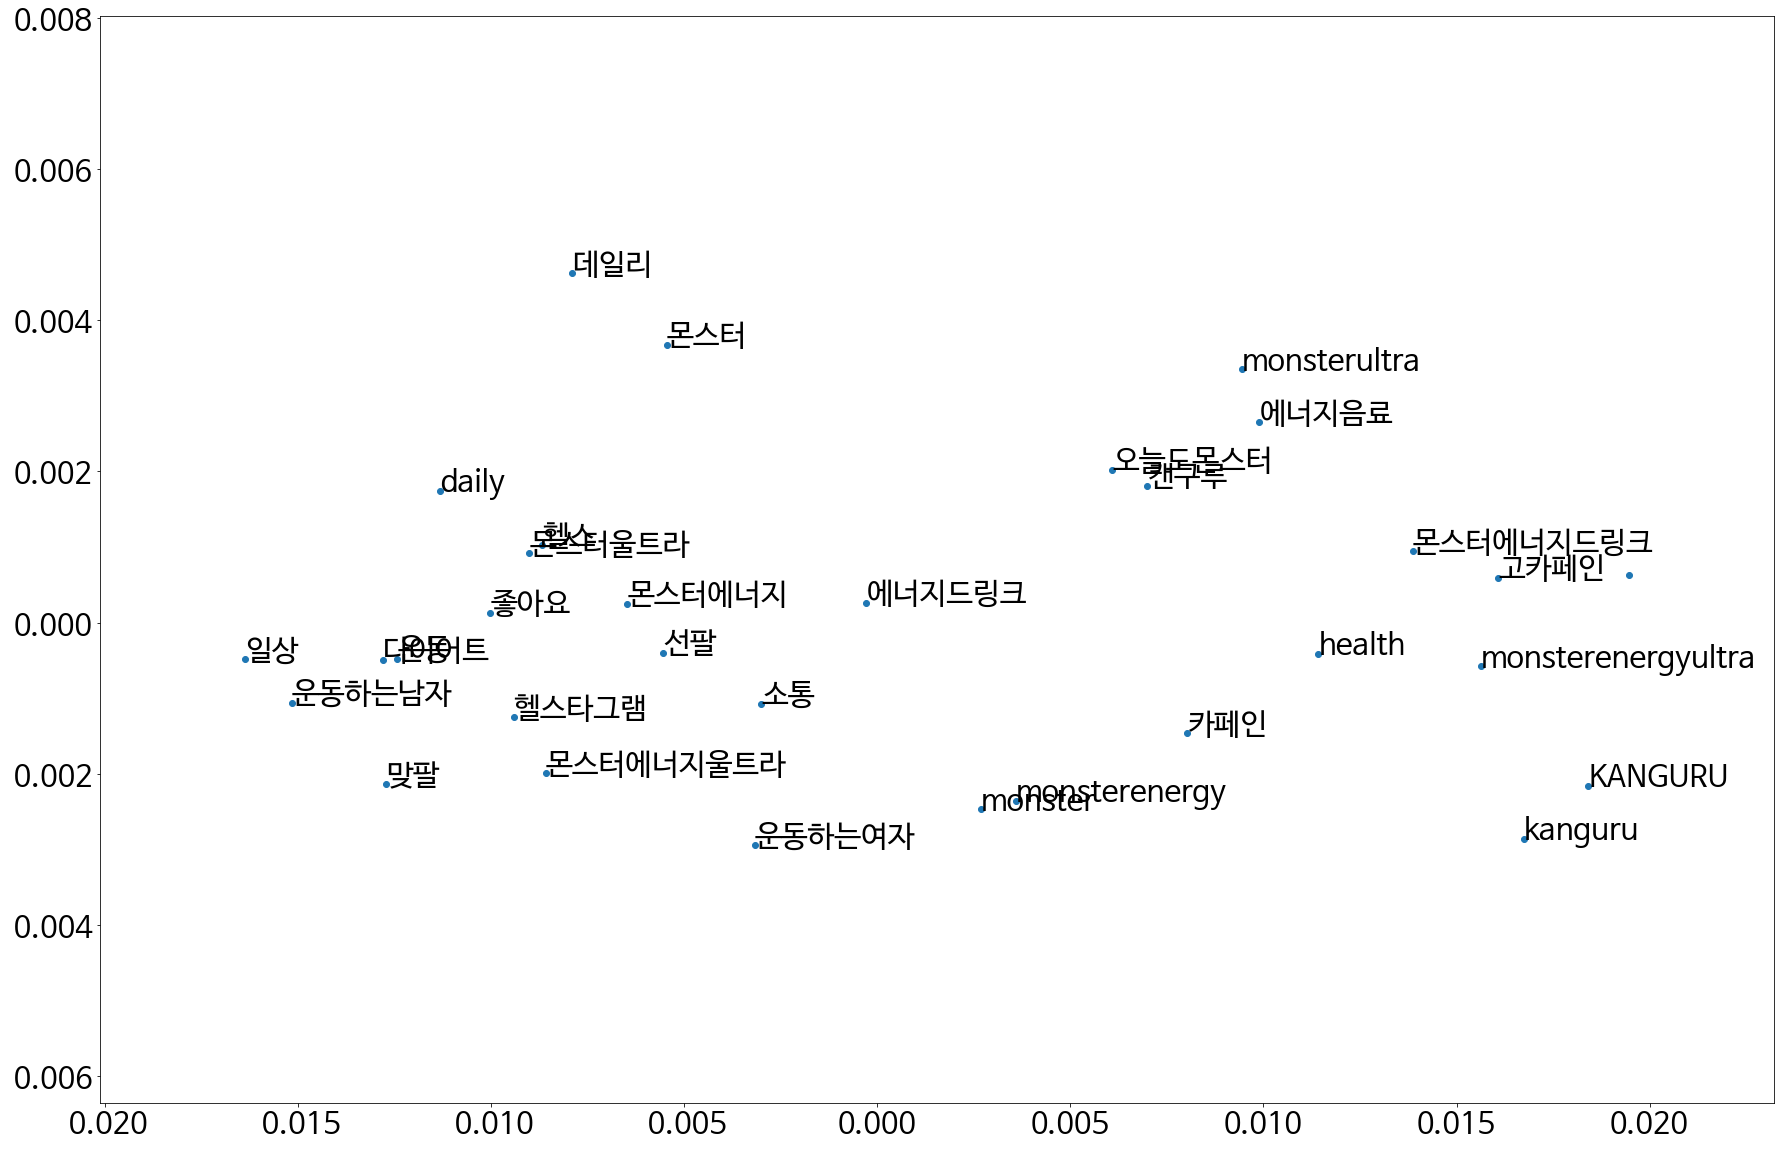

In [109]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))

# Location 분석

## - Word Cloud

In [55]:
locates = [element for array in list(df.Locates) for element in array]

In [56]:
monster_lc_stop_words = ['error','','south','korea']
cv = CountVectorizer(max_features=10000, stop_words = monster_lc_stop_words)
tdm = cv.fit_transform(locates)
word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat 
})

In [57]:
word_count.sort_values('빈도', ascending=False).head()

,단어,빈도
112,seoul,33
21,busan,15
121,station,9
307,우리집,7
77,incheon,7


In [58]:
wc = WordCloud(background_color='white',
               width=800, height=800, 
               font_path='NanumBarunGothicLight.ttf',
              colormap = 'hsv', # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
              max_words = 200)

In [59]:
count_dic = word_count.set_index('단어')['빈도'].to_dict()
cloud = wc.fit_words(count_dic)

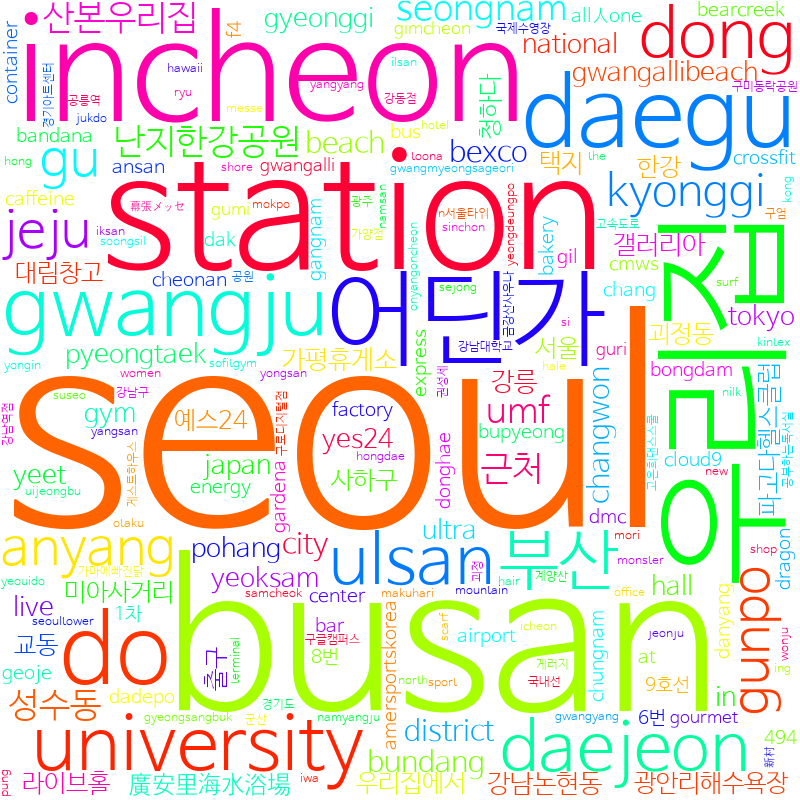

In [60]:
cloud.to_image()

## - Embedding

- LSA

In [61]:
tdm.shape

(354, 403)

In [62]:
# one hot encoding
import numpy as np

one_hot = np.eye(tdm.shape[1])

In [63]:
words = cv.get_feature_names()
tokens = locates

In [64]:
%%time
doc = np.zeros((1, tdm.shape[1]))

for token in tokens:
    try:
        i = words.index(token)
        doc += one_hot[i]
    except ValueError:
        pass

Wall time: 6.98 ms


In [65]:
%%time
svd = TruncatedSVD(n_components=1000)
svd.fit(tdm)

ValueError: n_components must be < n_features; got 1000 >= 403

In [66]:
svd.components_.shape

AttributeError: 'TruncatedSVD' object has no attribute 'components_'

In [ ]:
word_emb = svd.components_.T

In [ ]:
indices = []
target = list(word_count.sort_values('빈도', ascending=False)['단어'][0:100])
for w in target:
    i = words.index(w)
    indices.append(i)
    print(w, i)

In [ ]:
word_emb = svd.components_.T

In [ ]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name)

In [ ]:
%%time

comp1 = 0
comp2 = 1

pyplot.rcParams["figure.figsize"] = (20,10)
pyplot.plot(word_emb[indices, comp1], word_emb[indices, comp2], '.')

texts = [pyplot.text(word_emb[i, comp1], word_emb[i, comp2], w) for i, w in zip(indices, target)]

adjust_text(texts)

- T-SNE

In [ ]:
tsne = TSNE()

In [ ]:
%%time
pos = tsne.fit_transform(word_emb)

In [ ]:
pyplot.rcParams["figure.figsize"] = (20,10)

pyplot.plot(pos[indices, 0], pos[indices, 1], '.')

texts = [pyplot.text(pos[i, 0], pos[i, 1], w) for i, w in zip(indices, target)]

adjust_text(texts)

- Word2Vec

In [ ]:
sentences = list(df['Locates'])

In [ ]:
model = Word2Vec(sentences, size = 1000, min_count = 20, workers = 4, window = 100)

In [ ]:
%%time

word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

In [ ]:
%%time
pca = PCA(n_components = 2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [ ]:
font_name = font_manager.FontProperties(fname="NanumBarunGothicLight.ttf").get_name()
rc('font', family=font_name, size = 30)

In [ ]:
plt.rcParams['figure.figsize'] = [30, 20]
plt.scatter(xs, ys)
for i,v in enumerate(vocabs):
    plt.annotate(v, xy = (xs[i], ys[i]))